In [103]:
import re


In [327]:
import graphviz

class State:

    def __init__(self, name, style="solid", color="black"):
        self.name = name
        self.style = style
        self.color = color
        
        self.rendered = False
        
    def set_style(self, style):
        self.style = style

    def __eq__(self, other):
        if self.name == other:
            return True
        else:
            return False
    def __str__(self):
        return self.name
    
    def __repr__(self):
        return self.name

    def render(self, graph):
        graph.node(self.name, style=self.style, color=self.color)


class automata:

    def __init__(self, state_names, alphabet, start_state, final_states):
        self.alphabet = alphabet
        self.start_state = start_state
        self.final_states = final_states
        self.edges = list()
        self.states = list()
        self.graph = None

        for state_name in state_names:
            style= None
            if state_name == start_state:
                self.states.append(State("", style="invis"))
                style = "bold"
                self.edges.append(["", state_name, ""])
            if state_name in final_states:
                style = "dashed"
              
            self.states.append(State(state_name, style = style))

        return 
    
    def _check_start_end(self):
        for state in self.states:
            if state.name == "":
                continue
            if state.name == self.start_state:
                state.style = "bold" 
            if state.name in self.final_states:
                state.style = "dashed"
        return
            

    def edge(self, source, dest, rule):
        self.edges.append([source, dest, "  "+rule])
        if source not in self.states:
            self.states.append(State(source))
            self._check_start_end()
        if dest not in self.states:
            self.states.append(State(dest))
            self._check_start_end()
        return
    
    def _repr_svg_(self):
        self.graph = graphviz.Digraph()
        
        self._check_start_end() # Update if we changed/added the start/end states since making this obeject
        
        for state in self.states:
            state.render(self.graph)

        for e in self.edges:
            self.graph.edge(e[0], e[1], label=e[2])

        return self.graph._repr_svg_()


In [247]:
a = automata(["A", "B"], [], "A", "B")

# Regexplained 

##Samathy Barratt - PyConUK 2019

Going to discuss:
* Set Theory
* Theory of computation
* Finite Automata
* Languages

Regular Expressions

What is a regular expression?

A garbled collection of characters which somehow recognises strings

to me, they were always magic incantations - until I understood that they're more like an assembly language for finite automata.

##Where can we find regexes?

###String Matching

* Compilers

* Web Servers

* Pretty much any program that needs to know if a string, is a particular type of string or not

And that includes knowing if the type of string, is one that contains a substring or not.

Lets get onto looking at a regular expression

### `^(\w)+\@(\w)+\.(\w)`

A simple, nieve regex which matches email addresses

This regex _could_ be described like so:

$$ Q = \{q0, q1, q2, q3 \} $$
$$ \Sigma = \{\{a,b,c,d,e,f... x,y,z\}, \{"Unicode characters" \} $$
$$ \delta = Q x \Sigma \rightarrow Q $$
$$ q0 \in Q $$
$$ F \subseteq Q $$







In [248]:
#A very simple Regex

regex = re.compile("^(\w)+\@(\w)+\.(\w)")

expanse_characters = [
    "chrisjen_avasarala@UN.com",
    "James_Holden",
    "Amos_Burton",
    "Praxidike Meng",
    "Mei Meng",
    "Josephus_Miller@StarHelix.net",
    "Naomi_Nagata",
    "Bobbie Draper",
    "Dimitri_Havelock@StarHelix.net",
    "Fred_Johnson@TychoStation.space",
]

list(filter(regex.match, expanse_characters))



['chrisjen_avasarala@UN.com',
 'Josephus_Miller@StarHelix.net',
 'Dimitri_Havelock@StarHelix.net',
 'Fred_Johnson@TychoStation.space']

In [249]:
a = automata(
["A", "B", "C", "D"],
[],
"A",
["D"])

a.edge("A", "A", "\w")
a.edge("A", "B", "@")
a.edge("B", "B", "\w")
a.edge("B", "C", "\.")
a.edge("C", "D", "\w")
a.edge("D", "D", "\w")


Looks worse - but we could display that as a graph instead!

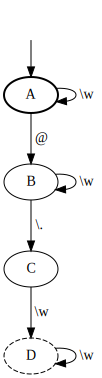

In [250]:
a

A bit better, but lets look at whats going on here.

We have broken our regular expression into a graph

This graph, and the formal mathematical explaination of it above, is a Deterministic Finite Automaton.

##Finite Automata

State Machines

Finite Automata, or state machines

The simplest model of computing
Very little memory, but surprisingly useful processing power.
Present in many small machines - like an electric door, or perhaps a washing machine.
Used in parts of compilers and many, many programs.
Can be used to represent much more complex computational problems.

Capable of recognising _Regular Languages_

### A Language is a _regular language_ as long as some finite automaton recognises it

A regular language is simple a collection of symbols from an alphabet. Can be letters, numbers, tokens or some other signal.

Ditching the regular expression for a second, lets look at what a finite automoton is

Lets recognise strings containing `01` anywhere.

In [251]:
states = set(["A", "B", "C"]) # Q = {"A", "B"}
alphabet = set([0,1])    # E = {0,1}
start_state = "A" # A is in states
end_state = states.intersection(set(["C"]))

In [317]:
zero_one_a = automata(states, alphabet, start_state, end_state)

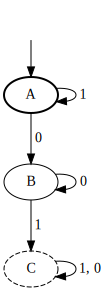

In [318]:
zero_one_a.edge("A", "A", "1")
zero_one_a.edge("A", "B", "0")
zero_one_a.edge("B", "B", "0")
zero_one_a.edge("B", "C", "1")
zero_one_a.edge("C", "C", "1, 0")

zero_one_a

DFAs have a number of states.

A here, is our starting state, A

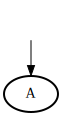

In [319]:
a = automata(["A"], [], "A", "")
a

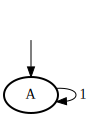

In [320]:
a.edge("A", "A", "1")
a

Our start state takes parts of our string as input, and does one of two things.

If its a 1, the machine stays in the A state
If its a 0, it moves on - perhaps because this is the start of the '01' string we're looking for.

If it stays in the A state and reaches the end of the string, the machine returns False, it dies, the input was
not one that we wanted.

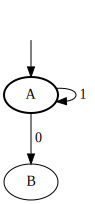

In [321]:
a.edge("A", "B", "0")
a

Next, we add the move to state `B`, only if the character was `0`.
We can essentially skip state A if the first character is `0`

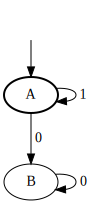

In [322]:
a.edge("B", "B", "0")
a

If the next character is a 0, then we've broken the 01 sequence.
cycle around on B until the next character.


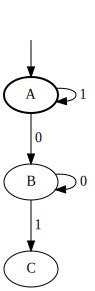

In [323]:
a.edge("B", "C", "1")
a

If the next one is a 1, then the `01` sequence is continued!

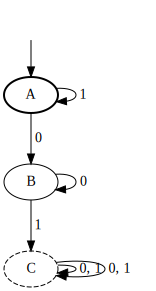

In [325]:
a.final_states = set("C")
a.edge("C", "C", "0, 1")
a

Finally, we cycle around on C in case there are spare characters at the end of the string.
If we reache the end of the string while sitting in the C state, then we're complete! we accept the string!

Hopefully this all makes sense!

Before we go back to Regular Expressions - we have to jump into _non-deterministic finite automoton_

##Non-Deterministic Finite Automoton

Unlike the prior example ( A deterministic finite automoton ) - NFAs are capable of being in more than one state at once.

NFA is a generalizeation of a DFA.
Every DFA is an NFA, just a restricted one.

In a DFA, every state has exactly one edge for every item in the alphabet.
An NFA may have many.

Consider an NFA which recognises the language of strings ending in `110`

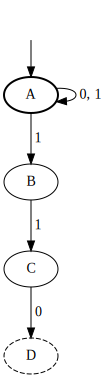

In [334]:
states = ["A", "B", "C", "D"]
alphabet = set([0,1])
start_state = "A"
end_states = set("D")

a = automata(states, alphabet, start_state, end_states)

a.edge("A", "A", "0, 1")
a.edge("A", "B", "1")
a.edge("B", "C", "1")
a.edge("C", "D", "0")

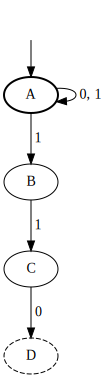

In [335]:
a

This automaton can be in two states at once - this means that for any character, it can both stay in the `A` state and transition to the `B` state.

You can think of this like forking a program for every node which has more than one edge for a given character of the alphabet.

NFAs can be reduced to DFAs through several different methods that I won't be going into today.

The main bonus of an NFA is the ability to represent more complex computations in less space than we'd need for the equivilent DFA.

They can't do more, or less than a DFA.